# Imbalance Data

In [1]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics
import random
from sklearn.svm import SVC
from catboost import CatBoostClassifier


/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
n = 100000
skip = sorted(random.sample(range(1,319795),319795-n))
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv',skiprows=skip).reset_index().rename(columns={'index':'id'})

In [3]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']

In [4]:
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,75-79,No,No,24.21,No,No,Good,No,0.0,No,0.0,White,Female,Yes,6.0,No,No
1,70-74,No,Yes,21.63,No,No,Fair,No,0.0,Yes,15.0,White,Female,Yes,4.0,No,No
2,80 or older,No,Yes,31.64,Yes,Yes,Good,No,0.0,No,5.0,White,Female,No,9.0,Yes,No
3,65-69,No,No,40.69,No,Yes,Good,No,0.0,Yes,0.0,White,Male,No,10.0,No,No
4,60-64,No,Yes,34.30,Yes,Yes,Poor,No,0.0,No,30.0,White,Male,No,15.0,Yes,No


# <font color="Brown">BMI :</font>

In [5]:
X['BMI'].describe() 

count    100000.000000
mean         28.323594
std           6.384032
min          12.080000
25%          23.960000
50%          27.320000
75%          31.460000
max          94.850000
Name: BMI, dtype: float64

In [6]:
# normal range 10 ~ 50

In [7]:
X[X['BMI']<=50].groupby(['Sex'])['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,51939.0,27.87067,6.261788,12.26,23.30,26.63,31.32,49.92
Male,47235.0,28.33789,5.364389,12.08,24.41,27.46,31.25,50.00


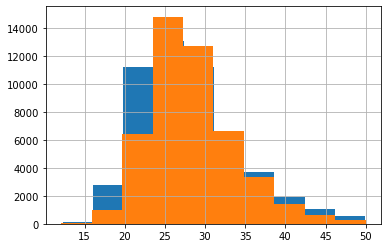

In [8]:
BMI_Normal_Range = X[X['BMI']<=50]
BMI_Normal_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

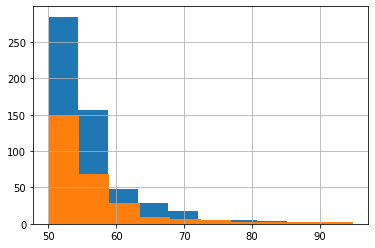

In [9]:
BMI_Out_Of_Range = X[X['BMI']>50]
BMI_Out_Of_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

In [10]:
# Drop rows with out of rage BMI
# X = X.drop(BMI_Out_Of_Range.index,errors='ignore')

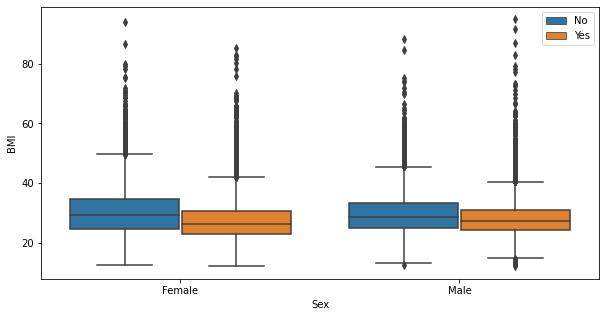

In [11]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=X['PhysicalActivity']).legend(loc='upper right')

# <font color="Brown">AlcoholDrinking :</font>

In [12]:
X['AlcoholDrinking'].describe()

count     100000
unique         2
top           No
freq       93234
Name: AlcoholDrinking, dtype: object

In [13]:
X['AlcoholDrinking'].value_counts()

No     93234
Yes     6766
Name: AlcoholDrinking, dtype: int64

# <font color="Brown">AgeCategory :</font>

In [14]:
X['AgeCategory'].describe()

count     100000
unique        13
top        60-64
freq       10521
Name: AgeCategory, dtype: object

In [15]:
X['AgeCategory'].value_counts()

60-64          10521
65-69          10505
70-74           9839
55-59           9362
50-54           8032
80 or older     7495
75-79           6742
45-49           6719
40-44           6628
18-24           6590
35-39           6424
30-34           5909
25-29           5234
Name: AgeCategory, dtype: int64

In [16]:
_1 = X[X['AgeCategory']!='80 or older']['AgeCategory'].str.split('-').apply(
    lambda x : (int(x[0])+int(x[1]))/2
)
_2 = X[X['AgeCategory']=='80 or older']['AgeCategory'].str.split(' or ').apply(
    lambda x : 80
)
X.loc[_1.index,'AgeCategory'] = _1
X.loc[_2.index,'AgeCategory'] = _2
del _1,_2

In [17]:
X['AgeCategory'] = X['AgeCategory'].astype(np.int64) 

/tmp/ipykernel_2656/1643673884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AgeCategory'] = X['AgeCategory'].astype(np.int64)


In [18]:
X['AgeCategory'].describe()

count    100000.000000
mean         54.352300
std          17.710506
min          21.000000
25%          42.000000
50%          57.000000
75%          67.000000
max          80.000000
Name: AgeCategory, dtype: float64

<AxesSubplot:>

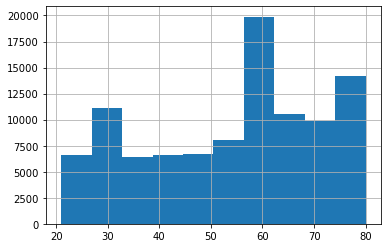

In [19]:
X['AgeCategory'].hist()

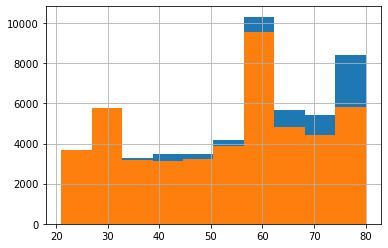

In [20]:
X.groupby(['Sex'])['AgeCategory'].hist()
PLT.show()

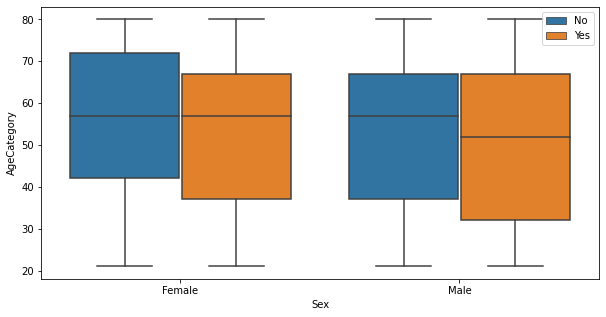

In [21]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Asthma']).legend(loc='upper right')

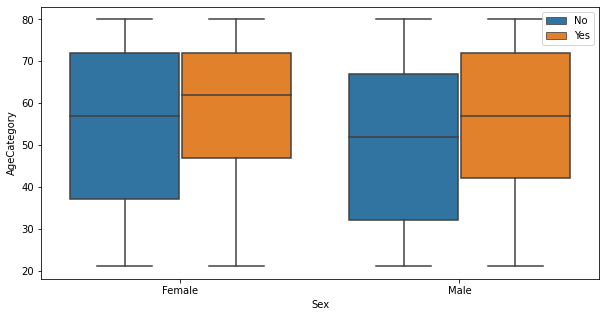

In [22]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Smoking']).legend(loc='upper right')

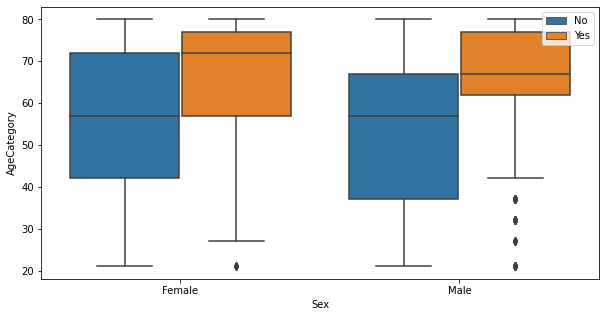

In [23]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Stroke']).legend(loc='upper right')

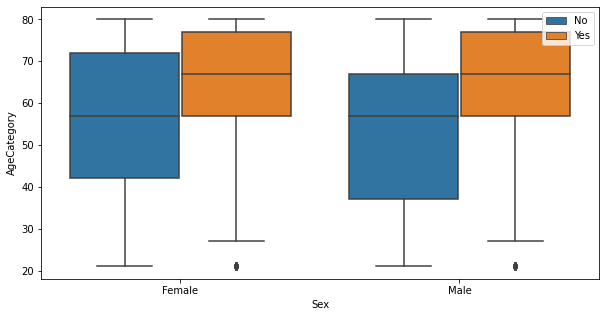

In [24]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['KidneyDisease']).legend(loc='upper right')

In [25]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','AgeCategory'
]

# <font color="Brown">Asthma :</font>

In [26]:
DF['Asthma'].value_counts()

No     86748
Yes    13252
Name: Asthma, dtype: int64

In [27]:
DF['Asthma'].describe()

count     100000
unique         2
top           No
freq       86748
Name: Asthma, dtype: object

In [28]:
DF['Asthma'].isnull().sum()

0

# <font color="Brown">Diabetic :</font>

In [29]:
X['Diabetic'].value_counts()

No                         84447
Yes                        12626
No, borderline diabetes     2131
Yes (during pregnancy)       796
Name: Diabetic, dtype: int64

In [30]:
X['Diabetic'].isnull().sum()

0

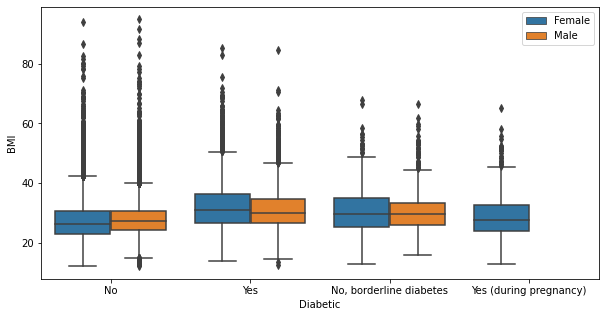

In [31]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Diabetic'],y=X['BMI'], hue=X['Sex']).legend(loc='upper right')

# <font color="Brown">DiffWalking :</font>

In [32]:
X['DiffWalking'].value_counts()

No     86075
Yes    13925
Name: DiffWalking, dtype: int64

In [33]:
X['DiffWalking'].isnull().sum()

0

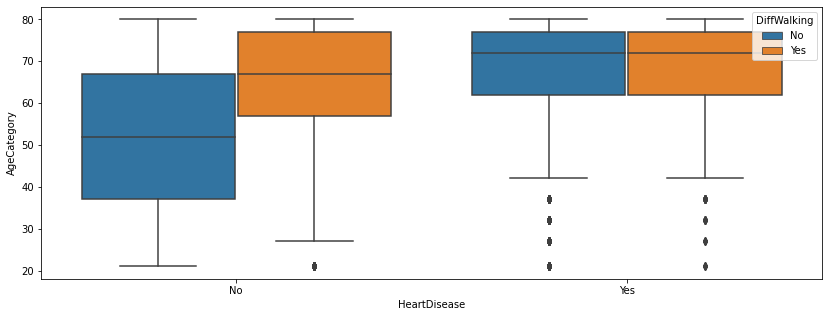

In [34]:
PLT.figure(figsize=(14,5))
SB.boxplot(x=Y,y=X['AgeCategory'], hue=X['DiffWalking']).legend(loc='upper right',title='DiffWalking')

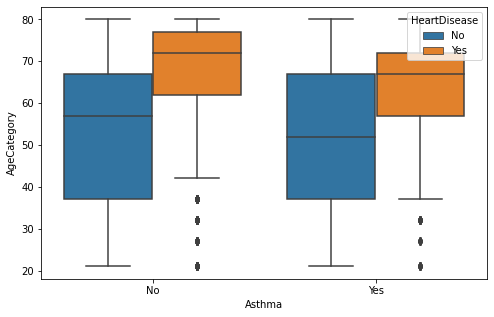

In [35]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['Asthma'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">GenHealth :</font>

In [36]:
X['GenHealth'].describe()

count        100000
unique            5
top       Very good
freq          35586
Name: GenHealth, dtype: object

In [37]:
X['GenHealth'].isnull().sum()

0

In [38]:
X['GenHealth'].value_counts()

Very good    35586
Good         29031
Excellent    20939
Fair         10833
Poor          3611
Name: GenHealth, dtype: int64

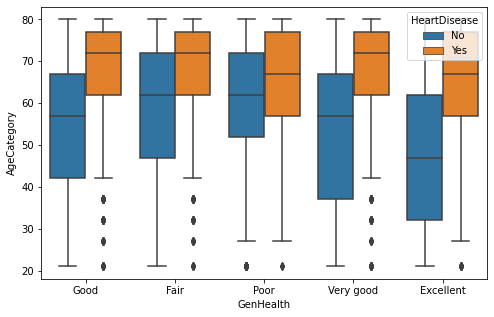

In [39]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['GenHealth'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">KidneyDisease :</font>

In [40]:
X['KidneyDisease'].describe()

count     100000
unique         2
top           No
freq       96353
Name: KidneyDisease, dtype: object

In [41]:
X['KidneyDisease'].isnull().sum()

0

In [42]:
X['KidneyDisease'].value_counts()

No     96353
Yes     3647
Name: KidneyDisease, dtype: int64

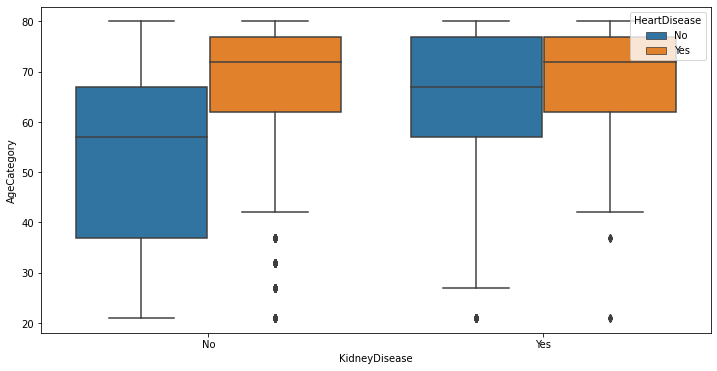

In [43]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['KidneyDisease'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">MentalHealth :</font>

In [44]:
X['MentalHealth'].describe()

count    100000.000000
mean          3.912090
std           7.960799
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [45]:
X['MentalHealth'].isna().sum()

0

In [46]:
X['MentalHealth'].value_counts().sort_index()

0.0     64099
1.0      2955
2.0      5135
3.0      3295
4.0      1669
5.0      4399
6.0       468
7.0      1711
8.0       357
9.0        66
10.0     3375
11.0       25
12.0      241
13.0       35
14.0      658
15.0     3102
16.0       56
17.0       40
18.0       70
19.0        9
20.0     1662
21.0      110
22.0       33
23.0       25
24.0       19
25.0      631
26.0       21
27.0       37
28.0      178
29.0      109
30.0     5410
Name: MentalHealth, dtype: int64

<AxesSubplot:>

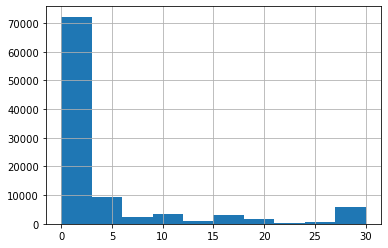

In [47]:
X['MentalHealth'].hist()

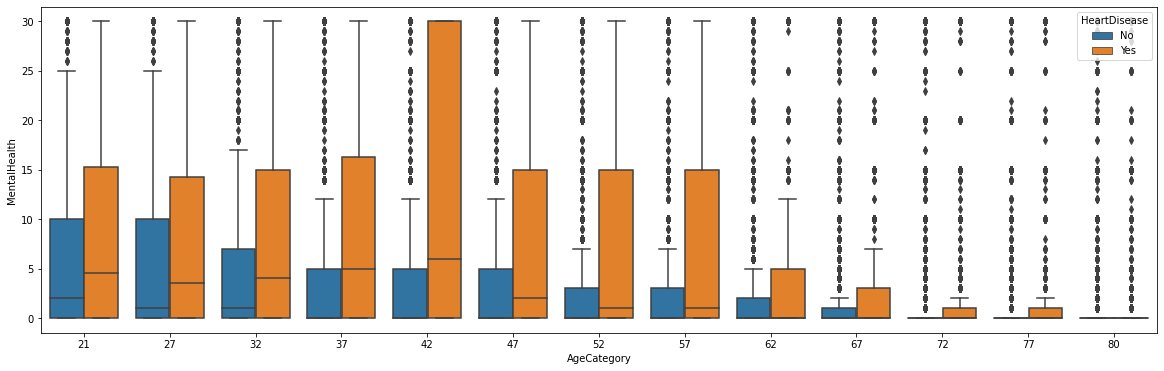

In [48]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['MentalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalActivity :</font>

In [49]:
X['PhysicalActivity'].describe()

count     100000
unique         2
top          Yes
freq       77354
Name: PhysicalActivity, dtype: object

In [50]:
X['PhysicalActivity'].isna().sum()

0

In [51]:
X['PhysicalActivity'].value_counts().sort_index()

No     22646
Yes    77354
Name: PhysicalActivity, dtype: int64

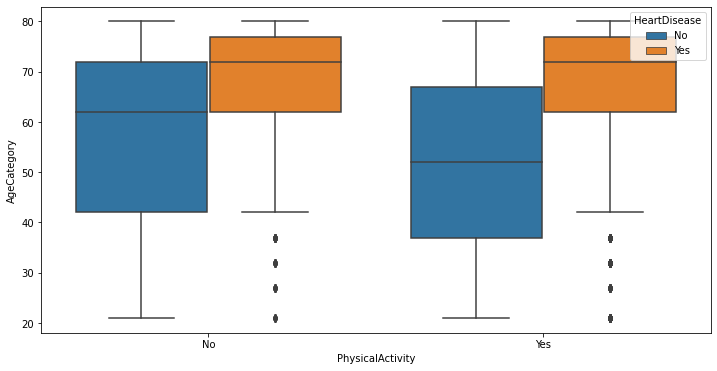

In [52]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['PhysicalActivity'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalHealth :</font>

In [53]:
X['PhysicalHealth'].describe()

count    100000.000000
mean          3.397760
std           7.985126
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PhysicalHealth, dtype: float64

In [54]:
X['PhysicalHealth'].isna().sum()

0

In [55]:
X['PhysicalHealth'].value_counts().sort_index()

0.0     70789
1.0      3278
2.0      4619
3.0      2679
4.0      1382
5.0      2375
6.0       386
7.0      1511
8.0       286
9.0        52
10.0     1698
11.0       29
12.0      182
13.0       29
14.0      932
15.0     1568
16.0       34
17.0       37
18.0       47
19.0       12
20.0     1032
21.0      184
22.0       34
23.0       12
24.0       22
25.0      351
26.0       25
27.0       29
28.0      142
29.0       64
30.0     6180
Name: PhysicalHealth, dtype: int64

<AxesSubplot:>

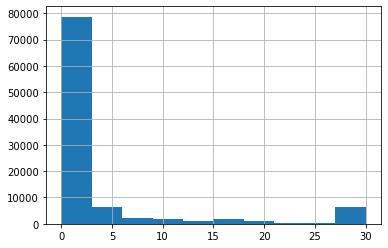

In [56]:
X['PhysicalHealth'].hist()

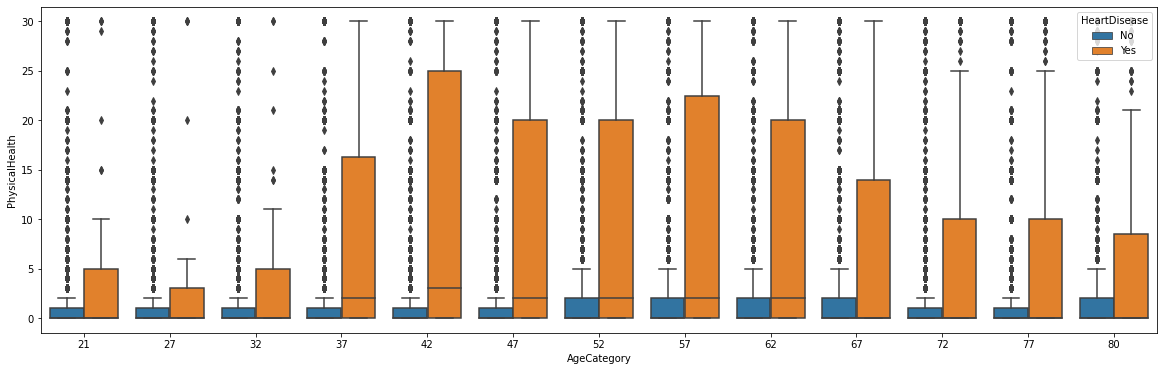

In [57]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['PhysicalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Race :</font>

In [58]:
X['Race'].describe()

count     100000
unique         6
top        White
freq       76687
Name: Race, dtype: object

In [59]:
X['Race'].isnull().sum()

0

In [60]:
X['Race'].value_counts()

White                             76687
Hispanic                           8504
Black                              7179
Other                              3435
Asian                              2531
American Indian/Alaskan Native     1664
Name: Race, dtype: int64

# <font color="Brown">Race :</font>

In [61]:
X['Sex'].describe()

count     100000
unique         2
top       Female
freq       52490
Name: Sex, dtype: object

In [62]:
X['Sex'].isnull().sum()

0

In [63]:
X['Sex'].value_counts()

Female    52490
Male      47510
Name: Sex, dtype: int64

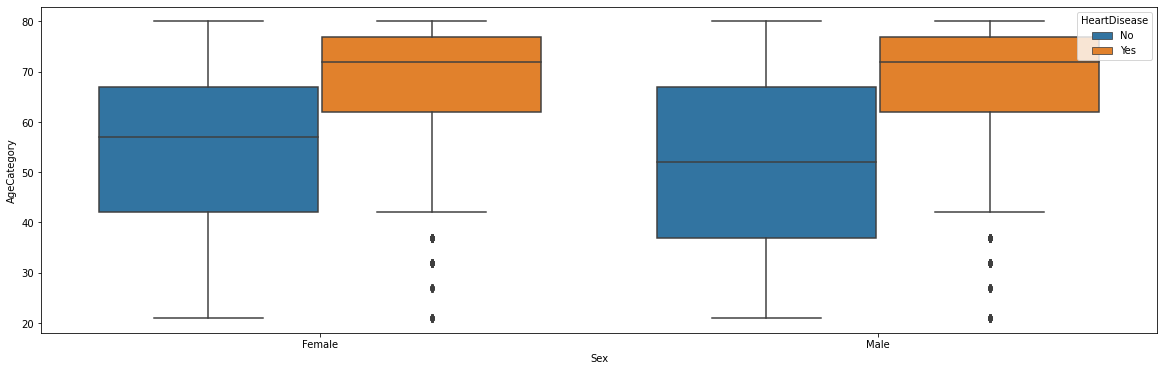

In [64]:
PLT.figure(figsize=(20,6))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Sex :</font>

In [65]:
X['Sex'].describe()

count     100000
unique         2
top       Female
freq       52490
Name: Sex, dtype: object

In [66]:
X['Sex'].isnull().sum()

0

In [67]:
X['Sex'].value_counts()

Female    52490
Male      47510
Name: Sex, dtype: int64

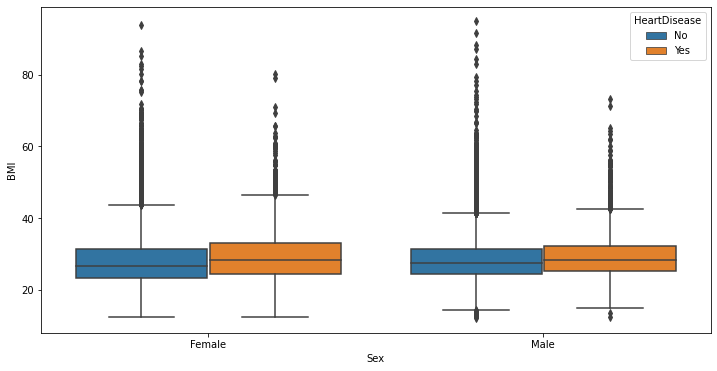

In [68]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">SkinCancer :</font>

In [69]:
X['SkinCancer'].describe()

count     100000
unique         2
top           No
freq       90662
Name: SkinCancer, dtype: object

In [70]:
X['SkinCancer'].isnull().sum()

0

In [71]:
X['SkinCancer'].value_counts()

No     90662
Yes     9338
Name: SkinCancer, dtype: int64

# <font color="Brown">SkinCancer :</font>

In [72]:
X['SkinCancer'].describe()

count     100000
unique         2
top           No
freq       90662
Name: SkinCancer, dtype: object

In [73]:
X['SkinCancer'].isnull().sum()

0

In [74]:
X['SkinCancer'].value_counts()

No     90662
Yes     9338
Name: SkinCancer, dtype: int64

# <font color="Brown">SleepTime :</font>

In [75]:
X['SleepTime'].describe()

count    100000.00000
mean          7.09454
std           1.44150
min           1.00000
25%           6.00000
50%           7.00000
75%           8.00000
max          24.00000
Name: SleepTime, dtype: float64

In [76]:
X['SleepTime'].isna().sum()

0

<AxesSubplot:>

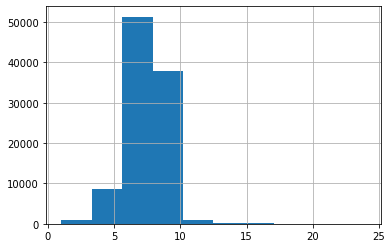

In [77]:
X['SleepTime'].hist()

In [78]:
# X = X.drop(X[X['SleepTime']>16]['SleepTime'].index,axis=0)

<AxesSubplot:>

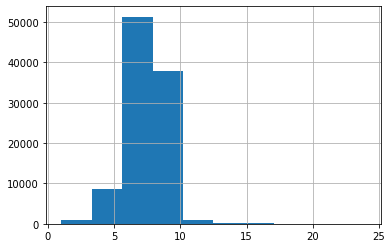

In [79]:
X['SleepTime'].hist()

# <font color="Brown">Smoking :</font>

In [80]:
X['Smoking'].describe()

count     100000
unique         2
top           No
freq       58698
Name: Smoking, dtype: object

In [81]:
X['Smoking'].isnull().sum()

0

In [82]:
X['Smoking'].value_counts()

No     58698
Yes    41302
Name: Smoking, dtype: int64

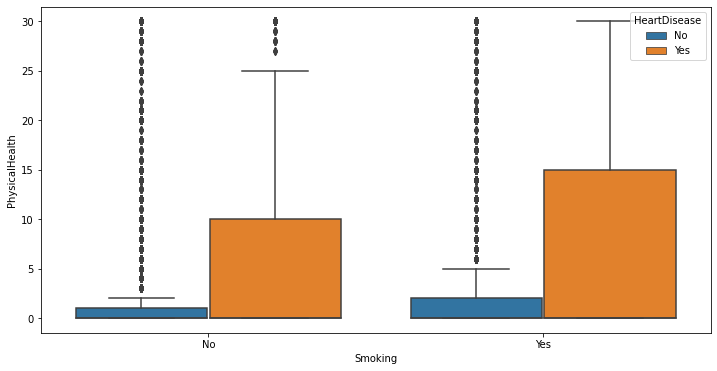

In [83]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

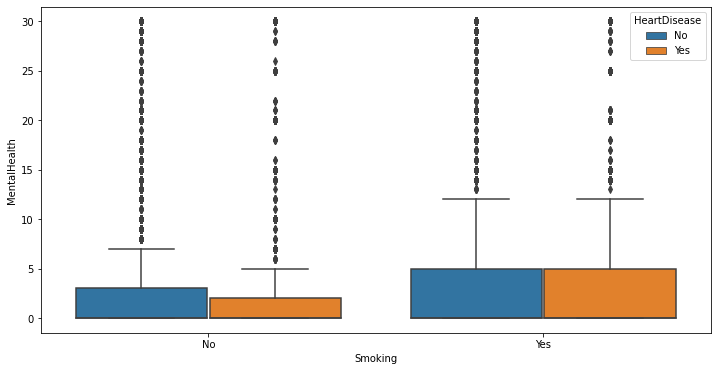

In [84]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Stroke :</font>

In [85]:
X['Stroke'].describe()

count     100000
unique         2
top           No
freq       96196
Name: Stroke, dtype: object

In [86]:
X['Stroke'].isnull().sum()

0

In [87]:
X['Stroke'].value_counts()

No     96196
Yes     3804
Name: Stroke, dtype: int64

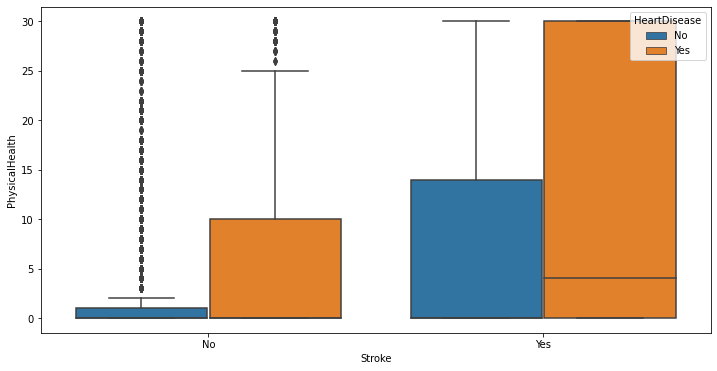

In [88]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

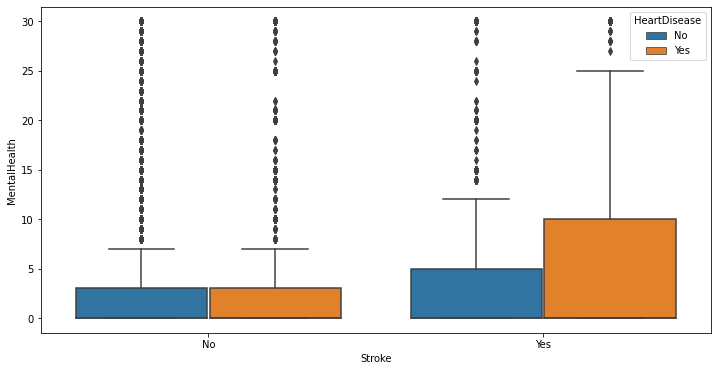

In [89]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Green">One Hot Encode Categorical Label :</font>

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def OHC_transformer_single_column(DF,columns):
    
    for column_name in columns:
        label_encoder = LabelEncoder()
        encoded = label_encoder.fit_transform(DF[column_name])
        labels =pd.Series(label_encoder.classes_)

        clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
        clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
        clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
        NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
        
        merged = DF.merge(NDF, left_index=True,right_index=True)
        merged = merged.drop(columns=[column_name])
        DF = merged
    return DF

In [91]:
X_OHC = OHC_transformer_single_column(X,CatCols) 
Y = DF.iloc[X_OHC.index]['HeartDisease']
Y_label_encoder = LabelEncoder()
Y_OHC = Y_label_encoder.fit_transform(Y)

In [92]:
NDF = pd.concat([X,Y],axis=1)
NDF_OHC = pd.concat([X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease'])],axis=1)

# <font color="Green">Imbalance Data  :</font>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

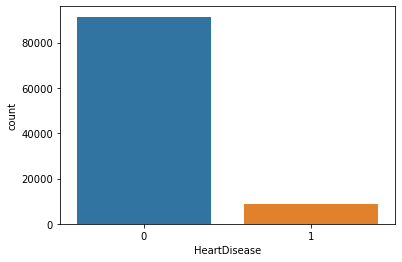

In [93]:
SB.countplot('HeartDisease',data=NDF_OHC)

In [94]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks

In [95]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease']))
DF_smote = pd.concat([X_smote,Y_smote],axis=1)

In [96]:
toml = TomekLinks()
X_toml, Y_toml = toml.fit_resample(X_smote,Y_smote)
DF_toml = pd.concat([X_toml,Y_toml],axis=1)

In [97]:
DF_toml

,AgeCategory,BMI,MentalHealth,PhysicalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,77,24.210000,0.000000,0.000000,6.000000,1.000000,0.000000,1.0,0.0,1.0,...,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,0.0,1.0,0
1,72,21.630000,0.000000,15.000000,4.000000,1.000000,0.000000,1.0,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,1.000000,1.0,0.0,0.0,1.0,0
2,80,31.640000,0.000000,5.000000,9.000000,0.000000,1.000000,1.0,0.0,1.0,...,1.000000,0.0,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,0
3,67,40.690000,0.000000,0.000000,10.000000,1.000000,0.000000,1.0,0.0,1.0,...,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,0
4,62,34.300000,0.000000,30.000000,15.000000,0.000000,1.000000,1.0,0.0,1.0,...,0.000000,1.0,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182362,77,31.364630,0.572558,0.000000,8.572558,0.000000,1.000000,1.0,0.0,1.0,...,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.0,0.0,1.0,1
182363,47,26.606587,0.000000,0.923463,7.000000,0.000000,1.000000,1.0,0.0,1.0,...,1.000000,0.0,0.000000,0.923463,0.076537,1.0,0.0,1.0,0.0,1
182364,67,29.584010,0.000000,0.000000,7.000000,0.381188,0.618812,1.0,0.0,1.0,...,0.000000,0.0,1.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,1
182365,72,22.493849,0.000000,0.000000,6.472802,1.000000,0.000000,1.0,0.0,1.0,...,0.527198,0.0,0.472802,1.000000,0.000000,1.0,0.0,1.0,0.0,1


 # <font color="Green">Normalize  :</font>

 # <font color="Green">feature reduction  :</font>

In [98]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In [99]:
from sklearn.decomposition import PCA,KernelPCA

In [100]:
pca = KernelPCA(n_components=2,kernel='poly',random_state=3220,gamma=1,degree=50,coef0=100000)
XPCA = pca.fit_transform(DF_toml.iloc[:,:-1])
PLT.scatter(XPCA[:,0],range(0,len(XPCA)),c=DF_toml.iloc[:,-1])

MemoryError: Unable to allocate 248. GiB for an array with shape (182367, 182367) and data type float64

 # <font color="Green">modeling  :</font>

In [ ]:
ZX = pd.concat([pd.DataFrame(XPCA),DF_toml.iloc[:,-1]],axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(ZX.iloc[:,:-1],ZX.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(DF_toml.iloc[:,:-1],DF_toml.iloc[:,-1],random_state=3020)

svm_classifier = SVC(C=1,kernel='rbf')
svm_classifier.fit(X_train,Y_train)
predicted = svm_classifier.predict(X_test)

print(metrics.classification_report(Y_test,predicted))
print(metrics.confusion_matrix(Y_test,predicted))